In [337]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ML Fundamentals

## Linear Regression

[SOURCE](https://towardsdatascience.com/linear-regression-from-scratch-with-numpy-implementation-finally-8e617d8e274c)

#### Description

#### Tradeoffs
- PRO
- CON

#### Use Cases

### From Scratch

X is `N x D` where `N` is number of examples and `D` is number of features

w is `D x 1`

y_hat is `1 x N` corresponding to a dependent output for each example

In [338]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [339]:
def gradient_descent(X, y, w, alpha=0.01, epochs=500):
    """
    X: examples
    y: ground truth outputs
    W: weights
    alpha: learning rate
    epochs: num iterations
    """
    n = len(y)
    losses = []
    for _ in range(epochs):
        w = w - (alpha/n) * X.T @ (X@w-y) # gradient update with learning rate and loss derivative w.r.t W
        losses.append(mse(X@w, y))
    return (losses, w)

In [340]:
def mse(y_hat, y):
    return np.sum((y_hat-y)**2)/(2*len(y)) # dividing by 2 cancels out 2 in derivative; remember to sum

def mse(y_hat, y):
    # This is an alternate way to do this; '@' is matrix mul or dot product
    return (((y_hat-y).T @ (y_hat-y)) / (2*len(y))).squeeze()  

In [341]:
def normalize(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    return (X-mu) / sigma

In [342]:
dataset = load_boston()
X = normalize(dataset['data']) # normalize data to be centered around mean=0 and stdev=1
y = dataset['target'][:, None] # 'None' adds a dimension; same as np.newaxis

# add intercept: y = w_1*x_1 + b, where b is w_2*1; 
# X is NxD; N=num examples; D=num dimensions, so this is stacking Nx1 column to the left of NxD to make (Nx(D+1))
X = np.hstack((np.ones((len(y), 1)), X)) 
w = np.zeros(X.shape[-1])[:, None] # w is Dx1 so X@w gives Nx1 for y; adding more "nodes" would make Dx(num_nodes)

X.shape, W.shape, y.shape # X.shape[-1] would have been 13 before adding intercept; same with W.shape[0]

((506, 14), (3,), (506, 1))

In [343]:
losses, w = gradient_descent(X, y, w) # toss the weights because we aren't using them

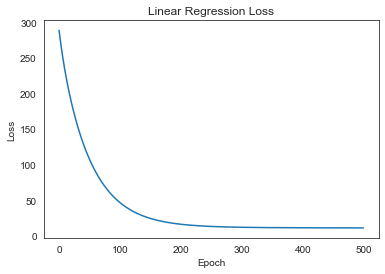

In [344]:
plt.plot(range(len(losses)), losses)
plt.title("Linear Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Using Scikit-Learn 

In [345]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [346]:
dataset = load_boston()
X = dataset['data'], dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [347]:
model = LinearRegression().fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_score, test_score # coef of determination or R^2; percent variation in dependent explained by independent

(0.7508856358979673, 0.6687594935356329)

In [348]:
model.predict(X_test)[:10]

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597])

## Logistic Regression

[SOURCE](https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece)

#### Description

#### Tradeoffs
- PRO
- CON

#### Use Cases

### From Scratch

Logistic Regression uses cross entropy loss, which is the same as logistic loss, log loss. 
Technically, this is using Binary Cross-Entropy loss because we're throwing in a sigmoid (logistic regression). 

This is a one node neural network with no hidden layers. 
Multiple nodes is: increasing size of `w` from `d * 1` where `d` is the number of features or the size of each example, to `d * num_nodes`; where `num_nodes > 1` makes this a multinomial logistic regression and can be used for multi-class classificaiton problems. Also `w` would become `W`. 

Adding hidden layers would be the same as adding multiple `w` matrices with each output as the input to the next "layer" with sizes: `d * num_nodes` x `num_nodes * new_d` and so on. Then you have a proper neural network. 

In [659]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [660]:
def gradient_descent(X, y, w, alpha=0.1, epochs=500):
    n = len(y)
    losses = []
    for _ in range(epochs):
        losses.append(cross_entropy(sigmoid(X@w), y))
        w = w - (alpha/n) * (X.T @ (sigmoid(X@w) - y))
    return (losses, w)

In [661]:
def cross_entropy(y_hat, y):
    eps = 1e-5  # need to add eps because ln(0) is undefined 
    # no need to sum over all examples if you use dot product
    loss = (1/len(y)) * (((-y).T @ np.log(y_hat+eps))-((1-y).T @ np.log((1-y_hat)+eps)))
    return loss.squeeze() # remove all unnecessary 1-Ds ex: (2, 1, 1) -> (2)

In [662]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [663]:
def normalize(X):
    mu = np.mean(X)
    sigma = np.std(X)
    return (X-mu) / sigma

In [664]:
def predict(X, w):
    return np.round(sigmoid(X@w))

In [665]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, 
                           n_clusters_per_class=1, random_state=14)
y = y[:, None]
# add intercept
X = np.hstack((np.ones((len(y), 1)), X))
w = np.zeros(X.shape[-1])[:, None]
X.shape, w.shape, y.shape

((500, 3), (3, 1), (500, 1))

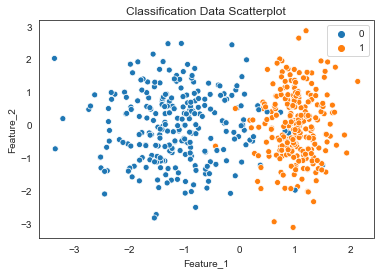

In [671]:
sns.set_style('white')
# below can do y.reshape(-1), which is telling numpy to infer the size of the first dimension
# so for ex: tensor.reshape(128*128, -1) means fit everything into 128*128 and whatever is left into dimension 2
sns.scatterplot(X[:,1], X[:,2], hue=y.squeeze()); # feature_1 x feature_2; same as y.reshape(-1)
plt.title("Classification Data Scatterplot")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

In [672]:
losses, w = gradient_descent(X, y, w)

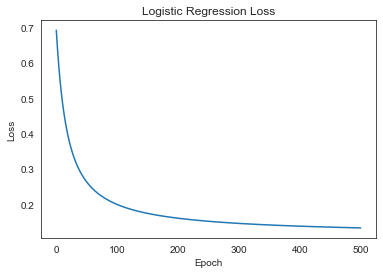

In [673]:
plt.plot(range(len(losses)), losses)
plt.title("Logistic Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [674]:
y_pred = predict(X, w)
accuracy = float(sum(y_pred==y)) / float(len(y))
accuracy

0.968

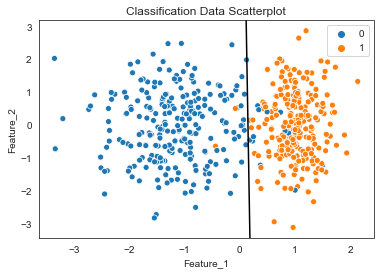

In [675]:
slope = -(w[1] / w[2])
intercept = -(w[0] / w[2])

sns.set_style('white')
sns.scatterplot(X[:, 1], X[:, 2], hue=y.squeeze())

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k")
plt.title("Classification Data Scatterplot")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

### Using Scikit-Learn

In [361]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

In [362]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, random_state=14)
X = np.hstack((np.ones((len(y), 1)), X))
X.shape, y.shape

((500, 3), (500,))

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 3), (100, 3), (400,), (100,))

In [364]:
model = LogisticRegression().fit(X_train, y_train)
train_score = model.score(X_train, y_train)  # mean accuracy
test_score = model.score(X_test, y_test)  # mean accuracy

train_score, test_score

(0.9675, 0.96)

In [365]:
y_pred = model.predict(X_test)
y_pred[:10], f1_score(y_test, y_pred)

(array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0]), 0.9591836734693877)

## K-Means

[SOURCE](https://mmuratarat.github.io/2019-07-23/kmeans_from_scratch)


#### Description
- Unsupervised clustering algorithm typically used for numeric data

#### Tradeoffs
- PRO
    - Pretty fast clustering algorithm
- CON
    - Have to know `k` in advance, or use Elbow method (try various values of `k` and pick dipping point)
    - Very sensitive to noise and outliers
    - Sometimes will get stuck in local optimum and not find optimal solution
    - Sensitive to initialization
    - Performs poorly with categorial data because L2 norm doesn't really make sense in that case

#### Use Cases
- Image segmentation
- News article clustering
- Anomaly detection

### From Scratch

#### General approach:
- randomly select k points to be centers
- keep an array of assingments for each point: you can use this to index into example array to get examples per cluster
- get distance from all examples to centers
- for each example, find the center with the min distance (using np.argmin) and assign point to that cluster
- for each cluster, calculate the mean, and set new center to calculated mean
- if new centers and old centers differ by more than some set threshold, keep training

In [2121]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from copy import deepcopy

In [2122]:
def k_means(X, k=3, thresh=1e-15):
    """
    k: number of clusters
    thres: diff between 
    """
    rand_idx = np.random.choice(X.shape[0], k, replace=False)  # sample without replacement
    centers_new = X[rand_idx]
    error = float("inf")
    while error >= thresh:  # stop training when centers_old and centers_new are the same-ish
        # each example (stacked k times sideways) minus each center with broadcasting; dims=(examples, k*3)
        diff = np.hstack([X for _ in range(k)]) - centers_new.reshape(1, -1) 
        # distances for each example-center; dims=(examples, k)
        distances = np.linalg.norm(diff.reshape(-1, k, 4), axis=2)  
        
        clusters = np.argmin(distances, axis=1)  # figure out cluster for each example (min distance)
        
        # get the mean of each set of points assigned to a particular cluster and set new center equal to mean
        centers_old = deepcopy(centers_new)
        for i in range(k):
            centers_new[i] = np.mean(X[clusters==i], axis=0)  # collapses 1st axis
        # this is doing the frobenius (matrix) norm of new-old centers; will work fine for stoppage
        error = np.linalg.norm(centers_new - centers_old)
    return (centers_new, clusters)

In [2123]:
dataset = load_iris()
X, y = dataset['data'], dataset['target']
X.shape, y.shape

((150, 4), (150,))

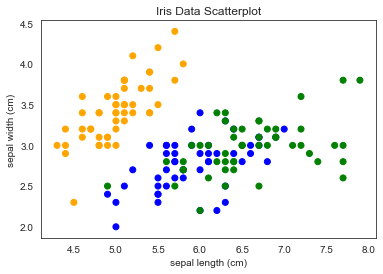

In [2124]:
colors = dict(zip(range(3), ['orange', 'blue', 'green']))
c_map = np.vectorize(lambda y, c: c[y]) # convert each class to color and vectorize the function
plt.scatter(X[:, 0], X[:, 1], c=c_map(y, colors))  # can also just do c=y
plt.title("Iris Data Scatterplot")
plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])
plt.show()

In [2125]:
centroids, clusters = k_means(X)

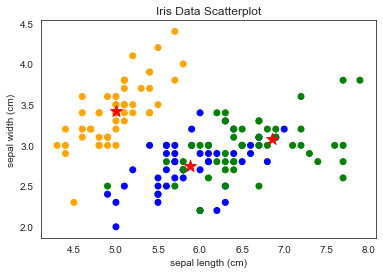

In [2126]:
plt.scatter(X[:, 0], X[:, 1], c=c_map(y, colors))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=150)
plt.title("Iris Data Scatterplot")
plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])
plt.show()

In [2127]:
centroids, clusters

(array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
        [5.88360656, 2.74098361, 4.38852459, 1.43442623],
        [5.006     , 3.428     , 1.462     , 0.246     ]]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]))

### Using Scikit-Learn

In [2128]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2129]:
dataset = load_iris()
X, y = dataset['data'], dataset['target']
X.shape, y.shape

((150, 4), (150,))

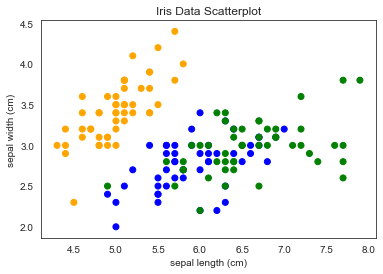

In [2133]:
colors = dict(zip(range(3), ['orange', 'blue', 'green']))
c_map = np.vectorize(lambda y, c: c[y])
plt.scatter(X[:, 0], X[:, 1], c=c_map(y, colors))
plt.title("Iris Data Scatterplot")
plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])
plt.show()

In [2134]:
model = KMeans(n_clusters=3).fit(X)
centroids = model.cluster_centers_

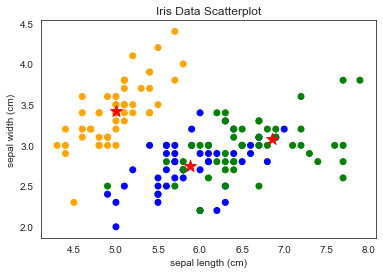

In [2135]:
plt.scatter(X[:, 0], X[:, 1], c=c_map(y, colors))
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=150)
plt.title("Iris Data Scatterplot")
plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])
plt.show()

## PCA

[SOURCE](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/)


#### Description
- A dimensionality reduction algorithm

#### Tradeoffs
- PRO
- CON

#### Use Cases

In [2136]:
import numpy as np
from sklearn.datasets import load_boston

In [2137]:
def pca(X, k=2):
    mu = np.mean(X, axis=0)  # mean of every column vector or feature
    X = X - mu  # subtract column means to center data
    cov = np.cov(X.T)  # covariance of each column with every other column
    
    # calculate eigendecomposition
    # eigenvectors are directions for each feature
    # eigenvalues control sign and magnitude
    values, vectors = np.linalg.eig(cov)  # values dim: (n_feats,); vectors dim: (n_feats, n_feats)
    
    # values are in decreasing magnitude, corresponding to importance of feature
    values, vectors = values[:k], vectors.T[:k]
    projection = X @ vectors.T  # use eigenvectors to project original data down to k dimensions
    return (values, vectors, projection)

In [2138]:
dataset = load_boston()
X = dataset['data']
X.shape

(506, 13)

In [2139]:
values, vectors, projection = pca(X)
values, vectors, projection

(array([30889.91126082,  6250.3300614 ]),
 array([[ 2.92973218e-02, -4.35898000e-02,  2.83309382e-02,
         -5.55846350e-05,  4.49721818e-04, -1.16815860e-03,
          8.36335746e-02, -6.56163360e-03,  4.50053753e-02,
          9.49741169e-01,  5.60011721e-03, -2.91218514e-01,
          2.29433756e-02],
        [ 6.66847277e-03,  1.17564821e-03, -4.94975624e-03,
         -1.02678850e-04,  1.82069867e-06,  3.65750108e-04,
         -5.72246652e-03,  3.53685109e-04, -8.61865948e-03,
         -2.92406308e-01, -2.52898538e-03, -9.56180551e-01,
          5.76719865e-03]]),
 array([[-119.81884272,   -5.56005586],
        [-168.89015548,   10.11620863],
        [-169.31170747,   14.0805323 ],
        ...,
        [-138.38716306,    0.9380922 ],
        [-137.50517338,    4.2518251 ],
        [-139.19033295,    1.00906423]]))

### Using Scikit-Learn

In [2140]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

In [2141]:
k = 2
model = PCA(k).fit(X)
projection = model.transform(X)

In [2142]:
model.explained_variance_, model.components_, projection

(array([30889.91126082,  6250.3300614 ]),
 array([[ 2.92973218e-02, -4.35898000e-02,  2.83309382e-02,
         -5.55846350e-05,  4.49721818e-04, -1.16815860e-03,
          8.36335746e-02, -6.56163360e-03,  4.50053753e-02,
          9.49741169e-01,  5.60011721e-03, -2.91218514e-01,
          2.29433756e-02],
        [ 6.66847277e-03,  1.17564821e-03, -4.94975624e-03,
         -1.02678850e-04,  1.82069867e-06,  3.65750108e-04,
         -5.72246652e-03,  3.53685109e-04, -8.61865948e-03,
         -2.92406308e-01, -2.52898538e-03, -9.56180551e-01,
          5.76719865e-03]]),
 array([[-119.81884272,   -5.56005586],
        [-168.89015548,   10.11620863],
        [-169.31170747,   14.0805323 ],
        ...,
        [-138.38716306,    0.9380922 ],
        [-137.50517338,    4.2518251 ],
        [-139.19033295,    1.00906423]]))

## Support Vector Machines

[SOURCE](https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2)


#### Description
- Supervised classification algorithm typically used for binary classification problems
- Uses a hyperplane to create a separation between examples of two classes with a maximum margin
- Support vectors are points close to the hyperplane that influence the position and direction of the hyperplane

#### Tradeoffs
- PRO
    - Effective in high dimensional spaces
    
- CON

#### Use Cases

### From Scratch

#### General Approach
- a hyperplane is defined with `wx+b`
- optimized with a cost function similar to deep learning
- uses a hinge loss for cost calculation with l2 regularization: max(0, 1-ty)

In [2143]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2144]:
def gradient_descent(X, y, w, reg_param=10, alpha=0.01, epochs=500):
    """
    reg_param: scales how much margin we want.
    Large value will heavily penalize points further away from hyperplane,
    forcing a tighter margin. 
    """
    n = len(y)
    losses = []
    for _ in range(epochs):
        distances = 1 - y * (X@w)
        hinge_loss = get_hinge_loss(distances)
        l2_loss = (1/2) * w.T@w  # l2 regularization
        loss = l2_loss + reg_param * hinge_loss
        losses.append(loss.squeeze())
        
        # only get indices where hinge loss is greater than 0
        # sum to maintain dimension of weight vector, and divide by num examples
        # finally add weight vector, to get a gradient vector for current iteration of hinge loss
        indices = (distances>0).squeeze()
        hinge_gradient = (np.sum((-reg_param * X * y)[indices], axis=0)/n)[:, None]
        gradient = w + hinge_gradient
        
        w = w - alpha * gradient  # update weight vector; don't have to divide by num examples here
        
    return (losses, w)

In [2145]:
def get_hinge_loss(distances):
    return np.sum(distances[distances>0]) / len(distances)  # max(0, distance)

In [2146]:
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target'][:, None]  # adding an axis for the 'target'
X = np.hstack((np.ones((X.shape[0], 1)), X))  # adding intercept
X = MinMaxScaler().fit_transform(X)
w = np.zeros((X.shape[1], 1))
X.shape, y.shape, w.shape

((569, 31), (569, 1), (31, 1))

In [2147]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [2148]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [2149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 31), (114, 31), (455, 1), (114, 1))

In [2150]:
losses, w = gradient_descent(X_train, y_train, w, alpha=0.001, epochs=1000)

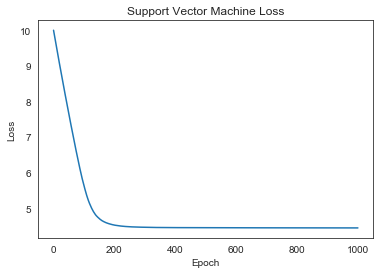

In [2151]:
plt.plot(range(len(losses)), losses)
plt.title("Support Vector Machine Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Using Scikit-Learn

In [2152]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2153]:
dataset = load_breast_cancer()
X, y = dataset['data'], dataset['target']
X.shape, y.shape

((569, 30), (569,))

In [2154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [2155]:
model = SVC(kernel="linear").fit(X_train, y_train)

In [2156]:
model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [2157]:
model.score(X_test, y_test)  # returns mean accuracy

0.956140350877193

## K-NN

[SOURCE](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)


#### Description
Used as a benchmark for SVM and NNs. This is a supervised learning algorithm. It is non-parametric, meaning it makes no assumptions about the function that maps inputs to outputs. It is also instance based, and doesn't learn a model - will only use training instances to produce an answer at inference time. 

Smaller values for `k` means low bias, high variance. Larger `k` averages more voters and is more resilient to outsiders. This is low variance, but high bias. 

Another way to think about KNN is that it creates decision boundaries between different classes. The boundary is smoother with a larger `k`, but if it's too large, then your label predictions during inference will be less nuanced, more coarse. 

#### Tradeoffs
- PRO
    - Low training time
- CON
    - Expensive test time
    - High memory and computational cost because there's no actual training so everything must be stored and computed during inference. 

#### Use Cases

### From Scratch

#### Approach
- Compute distance between new data point and all other data points in store. 
- Find `k` closest points and calculate conditional probability for each class. This means what percentage of of the `k` points belong to class A, B, ..., etc. 
- Assign `x` (the new data point) to the largest probable class. 

In [2158]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from functools import partial

In [2159]:
def knn(X_train, y_train, X_test, k):
    assert k >= 1, f"Number of neighbors must be greater than 0."
    k = min(k, len(X_train))  # make sure k can't be bigger than how many datapoints are in the train set
    return [predict(X_train, y_train, x_test, k) for x_test in X_test]

def predict(X_train, y_train, x_test, k):
    X_test = np.vstack([x_test for _ in range(len(X_train))])
    distances = np.linalg.norm(X_test - X_train, axis=1)  # get distances from each point in dataset
    indices = np.argsort(distances)[:k]  # returns k indices from original array of increasing distance
    return Counter(y_train[indices]).most_common()[0][0]  #  use voting to get the most common

In [2160]:
dataset = load_iris()
X, y = dataset['data'], dataset['target']
X.shape, y.shape

((150, 4), (150,))

In [2161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [2162]:
dataset['feature_names'], dataset['target_names']

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

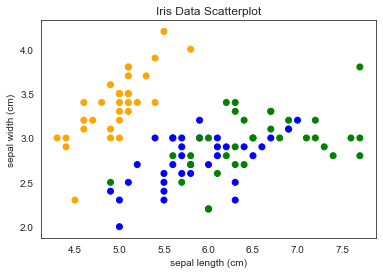

In [2164]:
colors = dict(zip(range(3), ['orange', 'blue', 'green']))
c_map = np.vectorize(lambda y, c: c[y])
plt.scatter(X_train[:, 0], X_train[:, 1], c=c_map(y_train, colors))
plt.title("Iris Data Scatterplot")
plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])
plt.show()

In [2165]:
model = partial(knn, X_train, y_train, X_test)  # partial application for cleaner code

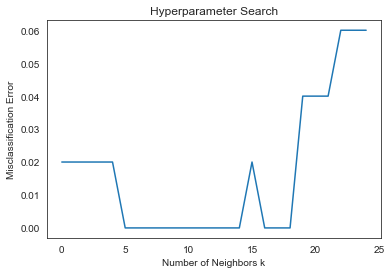

In [2166]:
# hyperparameter search
ks = list(range(1, 50, 2))
scores = [1-accuracy_score(y_test, model(k)) for k in ks]  # 1-score makes it error instead of accuracy
plt.plot(range(len(scores)), scores)
plt.title("Hyperparameter Search")
plt.xlabel("Number of Neighbors k")
plt.ylabel("Misclassification Error")
plt.show()

In [2167]:
k = 7
preds = model(k)
accuracy_score(y_test, preds)

0.98

### Using Scikit-Learn

In [2174]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2170]:
dataset = load_iris()
X, y = dataset['data'], dataset['target']
X.shape, y.shape

((150, 4), (150,))

In [2171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

In [2172]:
dataset['feature_names'], dataset['target_names']

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

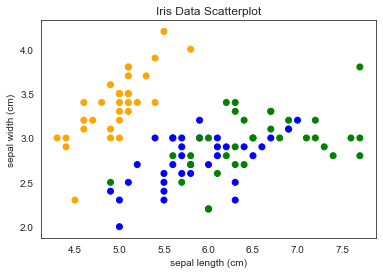

In [2173]:
colors = dict(zip(range(3), ['orange', 'blue', 'green']))
c_map = np.vectorize(lambda y, c: c[y])
plt.scatter(X_train[:, 0], X_train[:, 1], c=c_map(y_train, colors))
plt.title("Iris Data Scatterplot")
plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])
plt.show()

In [2205]:
# hyperparameter search with 10-fold cross validation and mean accuracy per fold
ks = list(range(1, 50, 2))
scores = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean())

errors = [1-s for s in scores]


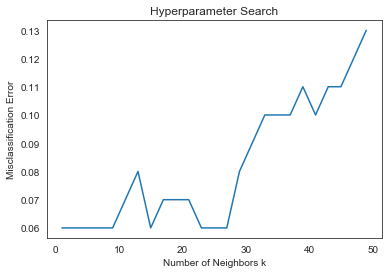

In [2206]:
plt.plot(ks, errors)
plt.title("Hyperparameter Search")
plt.xlabel("Number of Neighbors k")
plt.ylabel("Misclassification Error")
plt.show()

In [2207]:
k = ks[np.argmin(errors)]  # use k that minimizes error
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
preds = model.predict(X_test)
k, accuracy_score(y_test, preds)

(1, 0.98)

## Decision Tree

[SOURCE](https://towardsdatascience.com/decision-tree-from-scratch-in-python-46e99dfea775)


#### Description

#### Tradeoffs
- PRO
- CON

#### Use Cases

### From Scratch

### Using Scikit-Learn